# WPA #9 - Regression - Chapter 15

## Student Performance

In this WPA, you will analyze data from a study on student performance in two classes: math and Portugese. These data come from the UCI Machine Learning database at http://archive.ics.uci.edu/ml/datasets/Student+Performance#

The data were collected for this paper:  
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 

Here is the data description (taken directly from the original website):

*This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).*

### A. Data loading and preparation

1. Open a new script and enter your name, date, and the wpa number at the top. Set the working directory to the appropriate location using `setwd` (or add the script to your R Project). Save the script in the `R` folder in your project working directory as `wpa_9_LASTFIRST.R`, where LAST and FIRST are your last and first names. 

2. Download the data from the website (by clicking on `Data Folder`, and unzipping the downloaded `student` folder on your computer). We are going to use two of the files contained in the `student` folder: `student-mat.csv` and `student-por.csv`. Move them in the `data` folder you created (**in WPA 3**) in the `R project` folder.

3. Set the working directory to the `data` folder.

4. Load `student-mat.csv` and `student-por.csv` using `read.table()` as new objects, called, respectively, `student.math` and `student.por`. To load them, you shouldn't use the whole path, but just the file name. This, of course, only if you did points 2 and 3 correctly. Look back at **WPA 3** if you are having difficulties. You should not use `file.choose` to lead the data. You can help yourself using tab completion (https://support.rstudio.com/hc/en-us/articles/200404846-Working-in-the-Console#completion).

5. Look at the first few rows of the dataframe with the `head()` function to make sure it loaded correctly. If you see something weird (e.g., all the values are stuck together in one column) try to change the `sep` argument: With which character do you think the values were separated with?

6. How many rows and columns are there in the two dataframes? Use the `dim()` function to reply to this question.

In [51]:
#3
setwd('~/git/RcourseSpring2019/data/')

#4 and 5
student.math <- read.csv('student-mat.csv', sep=';')
student.por <- read.csv('student-por.csv', sep=';')

head(student.math)
head(student.por)

#6
dim(student.math)
dim(student.por)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


[1] 395  33

[1] 649  33

#### Datafile description

Both datafiles have 33 columns. Here they are:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 ???????? 5th to 9th grade, 3 ???????? secondary education or 4 ???????? higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

31 G1 - first period grade (numeric: from 0 to 20) 

31 G2 - second period grade (numeric: from 0 to 20) 

32 G3 - final grade (numeric: from 0 to 20, output target)

## B. Regression with one IV

1. Before you do anything else, look at the help file for `lm()`.

2. For the math data, create a regression object called `lm.b2` predicting first period grade (G1) based on age.

3. How do you interpret the relationship between age and first period grade?

4. For the math data, create a regression object called `lm.b4` predicting first period grade (G1) based on absences.

5. How do you interpret the relationship between absences and G1?

6. For the math data, create a regression object called `lm.b6` predicting first period grade (G1) based on school support (`schoolsup`).

7. How do you interpret the relationship between school support and G1? Given that school support is a nominal variable with 2 levels, how can you tell from the output (use `summary`) which direction the effect is? How does this relate to the way the data.frame has stored the levels of the school support factor (use str(student.math$schoolsup)). 

8. From the regression what would be your best guess for the first period grade for a student with no school support? What about for a student with school support?

9. For the math data, create a regression object called `lm.b9` predicting each student's period 3 grade (G3) based on their period 1 grade (G1).

10. How do you interpret the relationship between G1 and G3?

In [52]:
#1
#help(lm)

#2
lm.b2 <- lm(G1 ~ age, data = student.math)

#3
summary(lm.b2)

print("There is a slight negative relationship between age and first period grade (b = -0.17), however the relationship is not significant.
The direction and size of the relationship is given by b, labelled Estimate in the age line of the output. b is always interpreted as the change in the dependeant variable predicted by a 1 unit change in the predictor variable. So in this case a 1 year increase in age predicts that the first period grade will decrease by 0.17. 
This means that the units of both the predictor (age) and predicted (first period grade) matter when interpreting b. For instance if age was recorded in months instead of years b would be much smaller (as it would be predicting the change in grade caused by a 1 month increase in age. Estmate for age is also the slope of your regression line.
The Estimate in the intercept line of the output gives you the intercept of your regression line (i.e. the point at which your regression line cuts the Y-axis). In general you won't be interested in interpreting this parameter so it's significance doesn't matter but it should always be included in the model.")

#4
lm.b4 <- lm(G1 ~ absences, data = student.math)

#5
summary(lm.b4)
print("There is a slight negative relationship between absences and first period grade (b = -0.01), however the relationship is not significant")

#6
lm.b6 <- lm(G1 ~ schoolsup, data = student.math)

#7
summary(lm.b6)
print("There is a negative relationship between school support and first period grade (b = -2.1). 
Students with extra support from the school have worse Period 1 grades on average.
In the regression rather than a predictor labelled schoolsup because it is a nominal variable we are given the variable schoolsupyes. 
This tells us that b is the change in grade caused by going from no school support to yes school support. 
In essence R has dummy coded the variable so that students with no school support are given a value of 0 and those with yes school support a value of 1. 
If we look at the factor levels for the school support column we see that no is level 1 and yes level two. 'lm()' will always code predictors as the change 
from level 1 to level 2 (i.e. level 1 is coded as 0, and level 2 as 1).")

#8
print("The intercept estimate tells us the best estimate for first period grade when all predictor vairables have a value of 0. 
In this case we only have 1 predictor (school support) and it is dummy coded so that those without school support have a value of 0. 
Therefore the predicted first period grade for those without school support is 11.18 (the intercept estimate). 
We can also use our schoolsupportyes estimate to calculate our prediction for those with school support, 
Our estimate tells us that those on school support are predicted to have a first period grade that is 2.1 lower than those without school support, 
therefore they have a predicted grade of 9.08.
Because we have a single categorical predictor, these predicted scores should also be the mean of each of the groups.")
aggregate(G1 ~ schoolsup, data = student.math, FUN=mean)

#9
lm.b9 <- lm(G3 ~ G1, data = student.math)
summary(lm.b9)
print("There is a strong positive relationship between first period grade and third period grade (b = 1.1, p < .01). 
Basically for a 1 unit increase in first period grade third period grade increases by 1.1 on average.")


Call:
lm(formula = G1 ~ age, data = student.math)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6915 -2.7749 -0.1916  2.3085  8.3085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.6919     2.1926   6.245  1.1e-09 ***
age          -0.1667     0.1309  -1.273    0.204    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.317 on 393 degrees of freedom
Multiple R-squared:  0.004106,	Adjusted R-squared:  0.001572 
F-statistic:  1.62 on 1 and 393 DF,  p-value: 0.2038


[1] "There is a slight negative relationship between age and first period grade (b = -0.17), however the relationship is not significant.\nThe direction and size of the relationship is given by b, labelled Estimate in the age line of the output. b is always interpreted as the change in the dependeant variable predicted by a 1 unit change in the predictor variable. So in this case a 1 year increase in age predicts that the first period grade will decrease by 0.17. \nThis means that the units of both the predictor (age) and predicted (first period grade) matter when interpreting b. For instance if age was recorded in months instead of years b would be much smaller (as it would be predicting the change in grade caused by a 1 month increase in age. Estmate for age is also the slope of your regression line.\nThe Estimate in the intercept line of the output gives you the intercept of your regression line (i.e. the point at which your regression line cuts the Y-axis). In general you won't be 


Call:
lm(formula = G1 ~ absences, data = student.math)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8794 -2.9115  0.0177  2.2363  8.0692 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.98227    0.20539  53.470   <2e-16 ***
absences    -0.01286    0.02091  -0.615    0.539    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 393 degrees of freedom
Multiple R-squared:  0.0009612,	Adjusted R-squared:  -0.001581 
F-statistic: 0.3781 on 1 and 393 DF,  p-value: 0.539


[1] "There is a slight negative relationship between absences and first period grade (b = -0.01), however the relationship is not significant"



Call:
lm(formula = G1 ~ schoolsup, data = student.math)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1802 -2.1802 -0.1802  2.8198  7.8198 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.1802     0.1751  63.854  < 2e-16 ***
schoolsupyes  -2.1018     0.4873  -4.313 2.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.247 on 393 degrees of freedom
Multiple R-squared:  0.0452,	Adjusted R-squared:  0.04277 
F-statistic: 18.61 on 1 and 393 DF,  p-value: 2.036e-05


[1] "There is a negative relationship between school support and first period grade (b = -2.1). \nStudents with extra support from the school have worse Period 1 grades on average.\nIn the regression rather than a predictor labelled schoolsup because it is a nominal variable we are given the variable schoolsupyes. \nThis tells us that b is the change in grade caused by going from no school support to yes school support. \nIn essence R has dummy coded the variable so that students with no school support are given a value of 0 and those with yes school support a value of 1. \nIf we look at the factor levels for the school support column we see that no is level 1 and yes level two. 'lm()' will always code predictors as the change \nfrom level 1 to level 2 (i.e. level 1 is coded as 0, and level 2 as 1)."
[1] "The intercept estimate tells us the best estimate for first period grade when all predictor vairables have a value of 0. \nIn this case we only have 1 predictor (school support) and i

schoolsup,G1
no,11.180233
yes,9.078431



Call:
lm(formula = G3 ~ G1, data = student.math)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6223  -0.8348   0.3777   1.6965   5.0153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.65280    0.47475  -3.481 0.000555 ***
G1           1.10626    0.04164  26.568  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.743 on 393 degrees of freedom
Multiple R-squared:  0.6424,	Adjusted R-squared:  0.6414 
F-statistic: 705.8 on 1 and 393 DF,  p-value: < 2.2e-16


[1] "There is a strong positive relationship between first period grade and third period grade (b = 1.1, p < .01). \nBasically for a 1 unit increase in first period grade third period grade increases by 1.1 on average."


## C. Adding a regression line to a scatterplot

1. Create a scatterplot showing the relationship between G1 and G3 for the math data. Use transparency of color to show how much the points overlap (as, e.g., in **WPA 5, answer B3**). Give appropriate x and y labels.

2. Add a regression line to the scatterplot from your regression object `lm.b9` (hint: use `abline()`). When doing this you need to make sure that your predictor variable (in this case G1) is th x-axis and your predicted variable (G3) is the y axis. This is because the abline plots the predictions as the y-axis and the predictors as the x-axis.

3. Create a new figure in which you switch the variables so that your x-axis is now your y-axis and vice versa. Keep the model and abline the same. What happens? Remember to also switch the x and y labels appropriately...

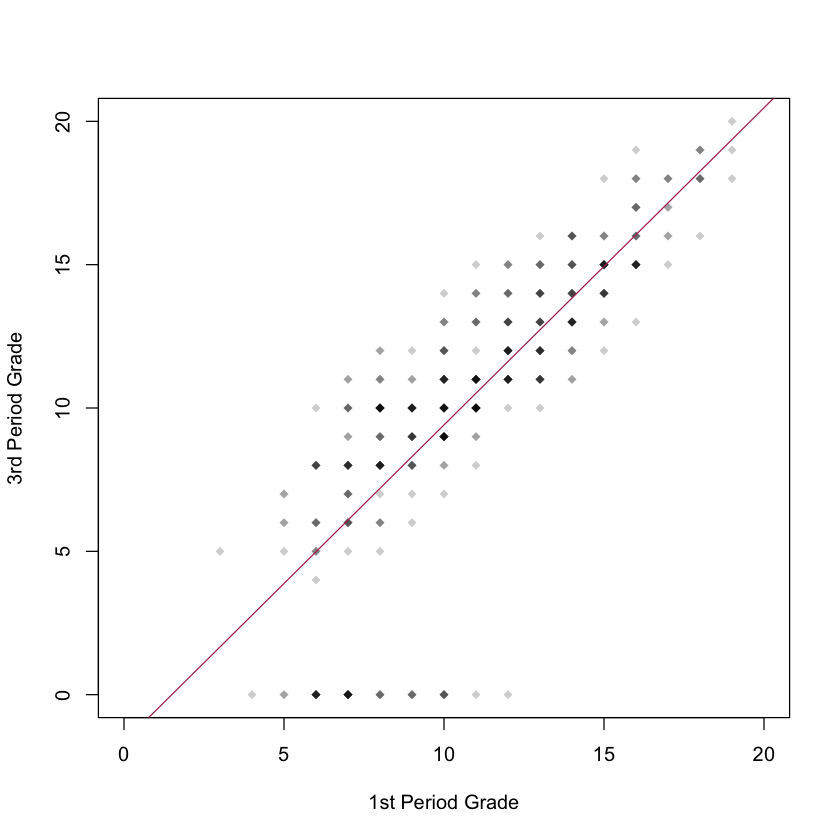

In [28]:
#1 and 2
plot(x = student.math$G1,
     y = student.math$G3, 
     ylab="3rd Period Grade",
     xlab="1st Period Grade",
     col = rgb(0, 0, 0, 0.2),
     pch=18,
     xlim=c(0,20),
     ylim=c(0,20))

abline(lm.b9,
       col='maroon')

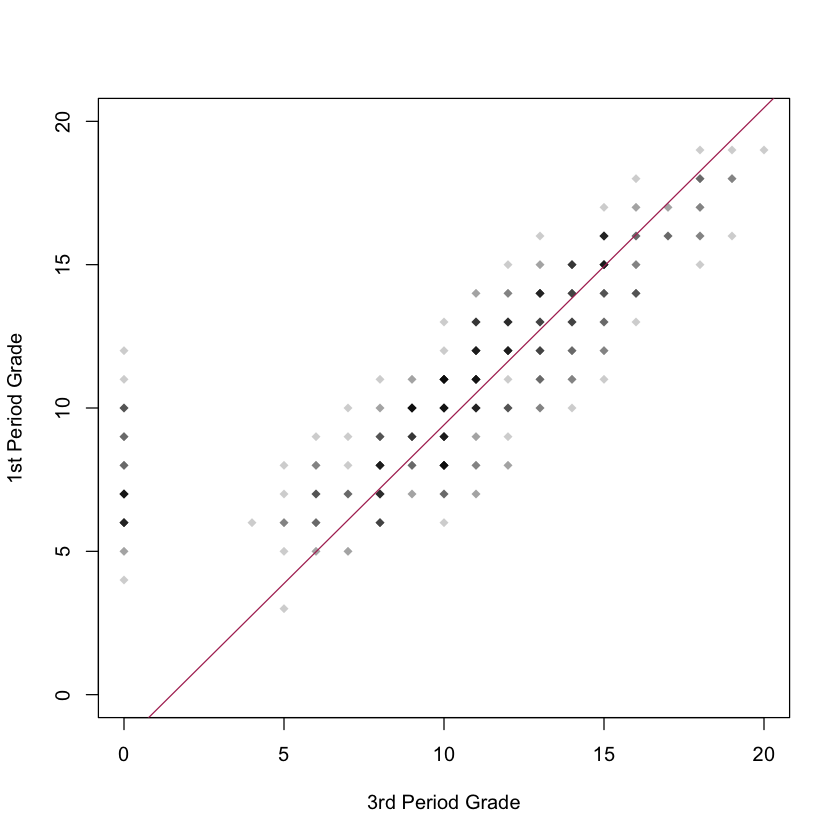

In [29]:
#3
plot(x = student.math$G3,
     y = student.math$G1, 
     ylab="1st Period Grade",
     xlab="3rd Period Grade",
     col = rgb(0, 0, 0, 0.2),
     pch=18,
     xlim=c(0,20),
     ylim=c(0,20))

abline(lm.b9,
       col='maroon')

## D. Multiple IVs

1. For the math data, create a regression object called `lm.d1` predicting third period grade (G3) based on sex, age, internet, and failures.

2. How do you interpret the regression output? Which variables are significantly related to third period grade?

3. Create a new regression object called `lm.d3` using the same variables as question D1 (the model was `lm.d1` where you predicted third period grade (G3) based on sex, age, internet, and failures): however, this time use the portugese dataset.

4. What are the key differences between the beta values for the portugese dataset (`lm.d3`) and the math dataset (`lm.d1`)?

In [31]:
#1
lm.d1 <- lm(G3 ~ sex + age + internet + failures, data = student.math)

#2
summary(lm.d1)
print("sex and failures predict third period grade. Men perform better than women (b = 1.04, p = 0.015), 
and the more failures a person has the lower their grade (b = -2.13, p<.01).")

#3
lm.d3 <- lm(G3 ~ sex + age + internet + failures, data = student.por)

#4
summary(lm.d3)
print("In the portugese datset, men do worse than women (b = -0.72, p < .01), and internet actually helps performance (b = 0.93, p < .01)! 
Failures still lower grades (b = -2.05, p < .01)")


Call:
lm(formula = G3 ~ sex + age + internet + failures, data = student.math)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2156  -1.9523   0.0965   3.0252   9.4370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.9962     2.9808   4.695 3.69e-06 ***
sexM          1.0451     0.4282   2.441   0.0151 *  
age          -0.2407     0.1735  -1.388   0.1660    
internetyes   0.7855     0.5761   1.364   0.1735    
failures     -2.1260     0.2966  -7.167 3.86e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.237 on 390 degrees of freedom
Multiple R-squared:  0.1533,	Adjusted R-squared:  0.1446 
F-statistic: 17.65 on 4 and 390 DF,  p-value: 2.488e-13


[1] "sex and failures predict third period grade. Men perform better than women (b = 1.04, p = 0.015), \nand the more failures a person has the lower their grade (b = -2.13, p<.01)."



Call:
lm(formula = G3 ~ sex + age + internet + failures, data = student.por)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8941  -1.8345   0.0522   1.8807   7.8041 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.61020    1.68101   6.907 1.19e-11 ***
sexM        -0.71515    0.23625  -3.027 0.002568 ** 
age          0.01986    0.10031   0.198 0.843134    
internetyes  0.92639    0.27508   3.368 0.000803 ***
failures    -2.04819    0.20738  -9.877  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.936 on 644 degrees of freedom
Multiple R-squared:  0.1794,	Adjusted R-squared:  0.1743 
F-statistic: 35.19 on 4 and 644 DF,  p-value: < 2.2e-16


[1] "In the portugese datset, men do worse than women (b = -0.72, p < .01), and internet actually helps performance (b = 0.93, p < .01)! \nFailures still lower grades (b = -2.05, p < .01)"


## E. Nominal Variable with 3 levels

1. For the math data, create a regression object called `lm.e1` predicting first period grade (G1) based on guardian. Guardian is a nominal variable with 3 levels.

2. Use `summary` to look at the output. You should see 2 predictors listed ("guardianmother" and "guardiananother"), rather than the expected 1 ("guardian"). `lm` has dummy coded your variables with "father" set as the reference group. Look at the levels of the guardian factor to see why "father" is the reference group.  How would you interpret the results? 

3. What is the predicted grade for those with a father as their guardian? Those with a mother? Those with other? Compare these to the means of each group again.

In [35]:
#1
lm.e1 <- lm(G1 ~ guardian, data = student.math)

#2
summary(lm.e1)
print("There is a light negative effect on first period grades of having mother as opposed to father as a guardian, but it is not significant. 
There is similarly a slight, non-sgnificant, effect of having another as your guardian compared to having your father.")

#3
print("We can use our three estimates to calculate these predictions like we did in Question 11. 
father is a reference group/coded as 0, so the predicted grade is the intercept estimate (11.11). 
For the other two groups we just need to add their estimate to the intercept, therefore our predicted grade for those with a mother is 10.88 
and for those with other it is 10.56.")

aggregate(G1 ~ guardian, data = student.math, FUN=mean)


Call:
lm(formula = G1 ~ guardian, data = student.math)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8828 -2.8828 -0.1111  2.1172  8.1172 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     11.1111     0.3505  31.705   <2e-16 ***
guardianmother  -0.2283     0.4041  -0.565    0.572    
guardianother   -0.5486     0.6843  -0.802    0.423    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.325 on 392 degrees of freedom
Multiple R-squared:  0.001775,	Adjusted R-squared:  -0.003318 
F-statistic: 0.3486 on 2 and 392 DF,  p-value: 0.7059


[1] "There is a light negative effect on first period grades of having mother as opposed to father as a guardian, but it is not significant. \nThere is similarly a slight, non-sgnificant, effect of having another as your guardian compared to having your father."
[1] "We can use our three estimates to calculate these predictions like we did in Question 11. \nfather is a reference group/coded as 0, so the predicted grade is the intercept estimate (11.11). \nFor the other two groups we just need to add their estimate to the intercept, therefore our predicted grade for those with a mother is 10.88 \nand for those with other it is 10.56."


guardian,G1
father,11.11111
mother,10.88278
other,10.56250


## F. Predicting values

1. For the math dataset, create a regression object called `lm.f1` predicting a student's first period grade (G1) based on all variables in the dataset (Hint: use the notation `formula = y ~ .` to include all variables!

2. Save the fitted values values from the `lm.f1` object as a vector called `lm.f1.fitted`.

3. For the math dataset, create a scatterplot showing the relationship between a student's first period grade (G1) and the fitted values from the model. Does the model appear to correctly fit a student's first period grade? Use `abline(a=0, b=1)` to plot the identity line and better answer to this question.

4. Create a new regression object, called `lm.f4` which doesn't include G2 or G3 as predictors, but still includes all other variables. (Hint: Don't enter all the predictor names by hand. Try modifying the data.frame instead to exclude the columns you don't need, i.e. use indexing). Save the fitted values from the `lm.f4` object as a vector called `lm.f4.fitted`.

5. There is also a better/easier way to do this. Just like + adds predictors, - can be used to remove predictors. Rewrite the model in aswer 4 using - instead of indexing, call it `lm.f5`. Save the fitted values from the `lm.f5` object as a vector called `lm.f5.fitted`.

6. Plot the predicted grades against the actual ones, as predicted by model `lm.f5`, as in question 3. How well does the new model perform now?

[1] "Yes it seems to work well. This is probably because we are including both G2 and G3 as predictors."


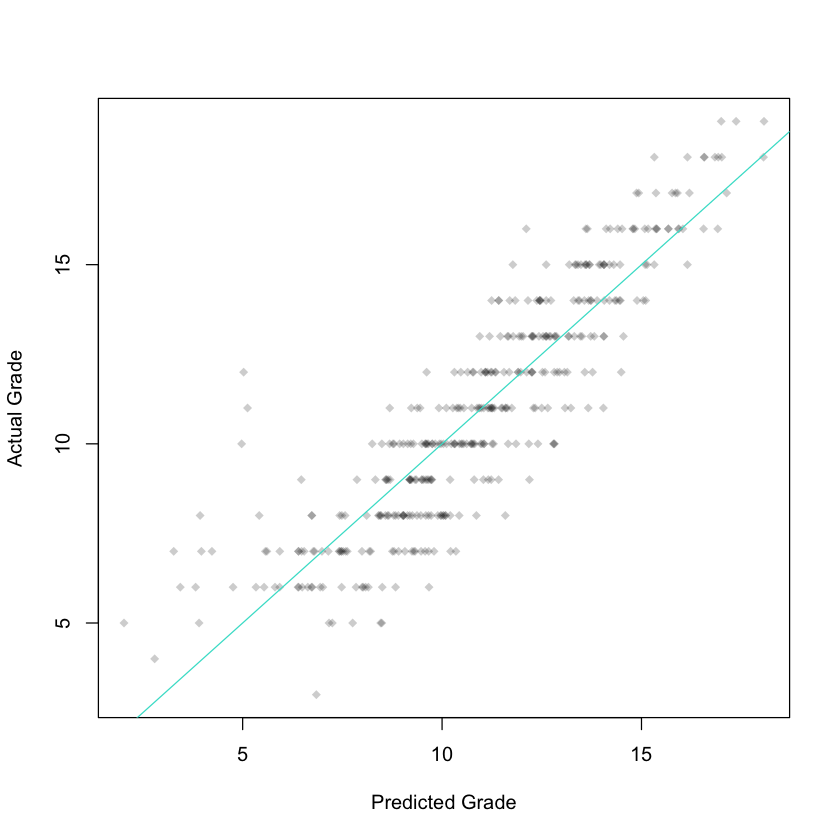

In [47]:
#1
lm.f1 <- lm(G1 ~., 
            data = student.math)

#2
lm.f1.fitted <- lm.f1$fitted.values

#3
plot(y= student.math$G1, 
     x= lm.f1.fitted,
     col = rgb(0, 0, 0, 0.2),
     pch=18,
     xlab= "Predicted Grade",
     ylab= "Actual Grade")

abline(a=0, 
       b=1,
       col='turquoise')

print("Yes it seems to work well. This is probably because we are including both G2 and G3 as predictors.")

[1] "It's performing a lot worse (Actually still explains like 30% of the variability so not that bad)"


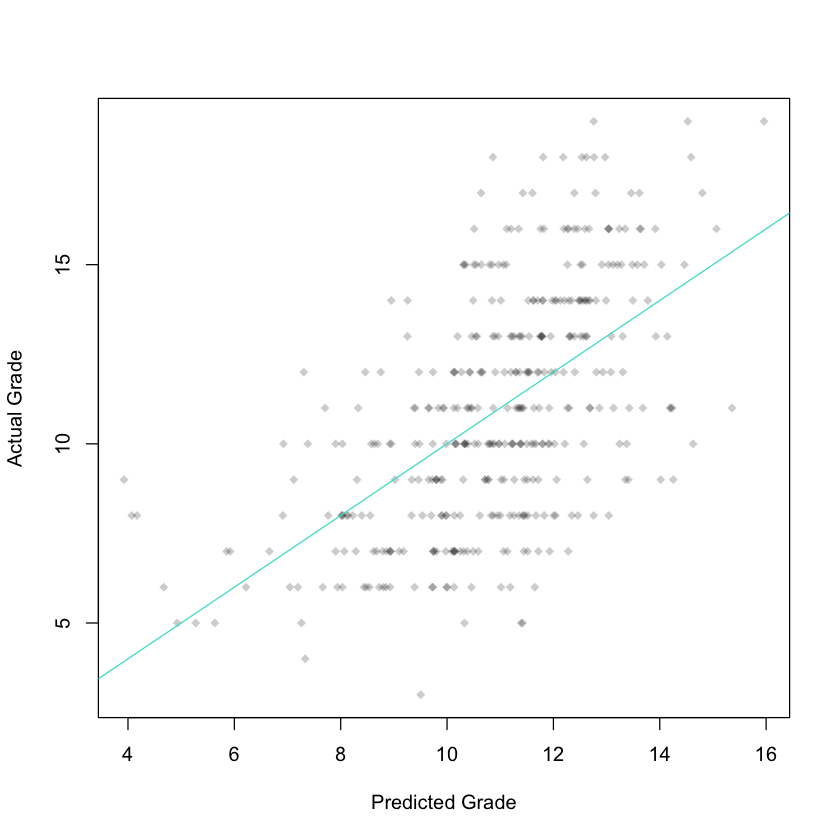

In [49]:
#4
#For Instance
new.math<- student.math[, names(student.math)!="G2"&names(student.math)!="G3"]
            #or
new.math<- student.math[,-which(names(student.math)%in%c("G2", "G3"))]
            

lm.f4 <- lm(G1 ~., 
            data = new.math)
lm.f4.fitted <- lm.f4$fitted.values

#5
lm.f5 <- lm(G1 ~. -G2 -G3, 
            data = student.math)
lm.f5.fitted <- lm.f5$fitted.values

#6
plot(y= student.math$G1, 
     x= lm.f5.fitted,
     col = rgb(0, 0, 0, 0.2),
     pch=18,
     xlab= "Predicted Grade",
     ylab= "Actual Grade")

abline(a=0, 
       b=1,
       col='turquoise')

print("It's performing a lot worse (Actually still explains like 30% of the variability so not that bad)")

### That's it! Now it's time to submit your assignment!

Save and email your `wpa_9_LastFirst.R` file to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch). 

Assignments sent after Sunday 5th May will not be considered (to pass the course you have to hand in all assignments for each week). 